<a href="https://colab.research.google.com/github/Brimarolafs/Gervigreind-Lokaverkefni-BJV/blob/main/Gervi_loka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np

def load_image(infilename, grayscale = False):
    if grayscale:
        img = Image.open( infilename ).convert('L')
    else:
        img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( outfilename )

def compress(infilename, size = 64, grayscale = False):
    if grayscale:
        img = Image.open(infilename).convert('L')
    else:
        img = Image.open(infilename)
    img = img.resize((size,size))
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def compression_pipeline(path_to_files, size = 64, grayscale = False):
    import os
    images = []
    for i,filename in enumerate(os.listdir(path_to_files)):
        img = compress(path_to_files + '/'+filename, size, grayscale)
        images.append(img)
    return np.array(images)

def pipeline(path_to_files, grayscale = False):
    import os
    images = []
    for i,filename in enumerate(os.listdir(path_to_files)):
        img = load_image(path_to_files + '/'+filename, grayscale)
        images.append(img)
    return np.array(images)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/pokemon_jpg'

data = pipeline(folder_path, grayscale = True)

In [ ]:
compressed_data = compression_pipeline(folder_path)

In [ ]:
data.shape

(819, 256, 256)

In [19]:
#Model 1
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.utils import np_utils
from keras import optimizers
from keras import layers
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D,Activation
from keras import regularizers
from tensorflow.keras.models import Model

latent_dim = 64*64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu'),])
    self.decoder = tf.keras.Sequential([
      layers.Dense(256 * 256, activation='sigmoid'),
      layers.Reshape((256,256))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

autoencoder.build((None,256,256))
autoencoder.summary()

# encoded_input = keras.Input(shape=(latent_dim,))
# decoder_layer = autoencoder.layers[-1]
# decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss=keras.losses.MeanSquaredError())


ResourceExhaustedError: ignored

In [ ]:
import sklearn.model_selection
import numpy as np

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, data, test_size = 0.2, random_state = 42)

print('X_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

autoencoder.fit(x_train, y_train,
                epochs=10,
                batch_size=24,
                shuffle=True,
                validation_data=(x_test, y_test))


# encoded_imgs = encoder.predict(x_test)
# decoded_imgs = decoder.predict(encoded_imgs)

X_train shape: (655, 256, 256)
655 train samples
164 test samples
Epoch 1/10
28/28 [==============================] - 4s 124ms/step - loss: 48972.7148 - val_loss: 48933.6836
Epoch 2/10
28/28 [==============================] - 3s 120ms/step - loss: 48961.5742 - val_loss: 48929.6797
Epoch 3/10
28/28 [==============================] - 3s 122ms/step - loss: 48958.5742 - val_loss: 48927.3398
Epoch 4/10
28/28 [==============================] - 3s 119ms/step - loss: 48955.9375 - val_loss: 48924.2852
Epoch 5/10
28/28 [==============================] - 4s 128ms/step - loss: 48953.2461 - val_loss: 48921.9336
Epoch 6/10
28/28 [==============================] - 3s 120ms/step - loss: 48951.2500 - val_loss: 48920.3672
Epoch 7/10
28/28 [==============================] - 3s 121ms/step - loss: 48949.9414 - val_loss: 48919.0586
Epoch 8/10
28/28 [==============================] - 3s 120ms/step - loss: 48948.3906 - val_loss: 48917.3398
Epoch 9/10
28/28 [==============================] - 4s 126ms/step - lo

In [ ]:
import matplotlib.pyplot as plt

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

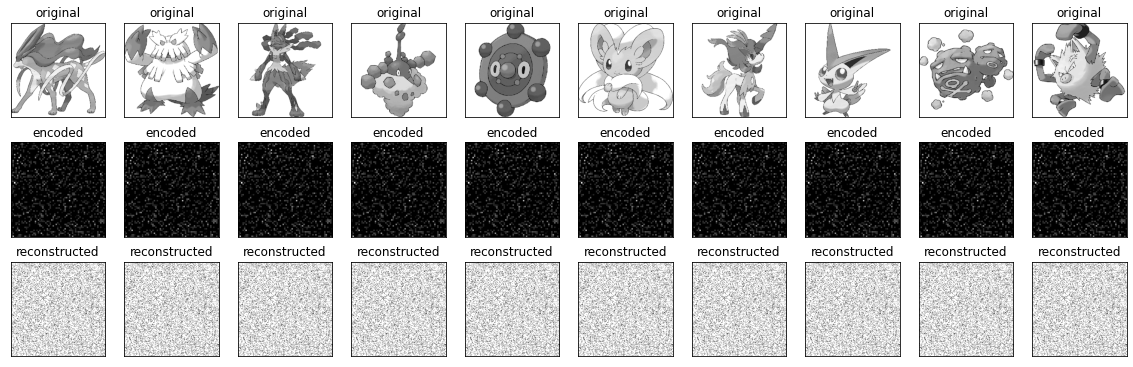

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape((64,64)))
  plt.title("encoded")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + 2 * n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.subplots_adjust(top = 1.3)  
plt.show()

In [ ]:
#make autoencoder
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.utils import np_utils
from keras import optimizers
from keras import layers
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D,Activation

#input is 819 transparent Pokemon images in png format size 256x256.
#output is 819 transparent Pokemon images in png format size 256x256.

#add encoded and decoded


lr = 2e-4
batch_size = 16
input_shape = keras.Input(shape=(256, 256, 3))

x = layers.Conv2D(64, 3, activation="relu", padding="same")(input_shape)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(32, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(16, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(8, 3, activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D(2, padding="same")(x)

# at this point the representation is (16, 16, 8) i.e. 2048-dimensional

x = layers.Conv2D(8, 3, activation="relu", padding="same")(encoded)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(16, 3, activation="relu", padding="same")(x)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.UpSampling2D(2)(x)
decoded = layers.Conv2D(4, 3, activation="sigmoid", padding="same")(x)

autoencoder = keras.Model(input_shape, decoded)

autoencoder.compile(optimizer='adam', loss='l2')



autoencoder.summary()

In [ ]:
np.shape(data)
data = data.reshape((len(data), np.prod(data.shape[1:])))

In [ ]:
import matplotlib.pyplot as plt

num_epochs = 10

history = autoencoder.fit(data, data
                    , batch_size = batch_size
                    , epochs = num_epochs
                    , verbose = 1
)


bla = autoencoder.predict(data[0])

plt.imshow(bla)


In [ ]:
import visualkeras

visualkeras.layered_view(autoencoder).show() # display using your system viewer
visualkeras.layered_view(autoencoder, to_file='autoencoder.png') # write to disk

In [ ]:
!pip install visualkeras

In [ ]:

input_shape = keras.Input(shape=(256, 256, 4))

encoded = layers.Dense(2048, activation='relu')(input_shape)
encoded = layers.Dense(1024, activation='relu')(encoded)
encoded = layers.Dense(512, activation='relu')(encoded)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(1024, activation='relu')(decoded)
decoded = layers.Dense(2048, activation='relu')(decoded)

autoencoder = keras.Model(input_shape, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()